In [1]:
from go import *

Initializing database connection...
Database connected!
Getting data took 0 minutes, 0 seconds.


In [2]:
n.find_neighbours()

In [3]:
n.cellularize()

In [4]:
cell_lines = gpd.GeoDataFrame(geometry=gpd.GeoSeries(n.cells.geometry.boundary))

In [6]:
names = n.db.contains('opennames', n.geom.buffer(1))

In [12]:
names.columns

Index(['ID', 'NAMES_URI', 'NAME1', 'NAME1_LANG', 'NAME2', 'NAME2_LANG', 'TYPE',
       'LOCAL_TYPE', 'MOST_DETAIL_VIEW_RES', 'LEAST_DETAIL_VIEW_RES',
       'MBR_XMIN', 'MBR_YMIN', 'MBR_XMAX', 'MBR_YMAX', 'POSTCODE_DISTRICT',
       'POSTCODE_DISTRICT_URI', 'POPULATED_PLACE', 'POPULATED_PLACE_URI',
       'POPULATED_PLACE_TYPE', 'DISTRICT_BOROUGH', 'DISTRICT_BOROUGH_URI',
       'DISTRICT_BOROUGH_TYPE', 'COUNTY_UNITARY', 'COUNTY_UNITARY_URI',
       'COUNTY_UNITARY_TYPE', 'REGION', 'REGION_URI', 'COUNTRY', 'COUNTRY_URI',
       'RELATED_SPATIAL_OBJECT', 'SAME_AS_DBPEDIA', 'SAME_AS_GEONAMES',
       'geometry'],
      dtype='object')

In [14]:
names.LOCAL_TYPE.unique()

array(['Postcode', 'Named Road', 'Primary Education'], dtype=object)

In [15]:
names.TYPE.unique()

array(['other', 'transportNetwork'], dtype=object)

In [70]:
road_names = names.loc[names.LOCAL_TYPE.str.contains('Named Road')]

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


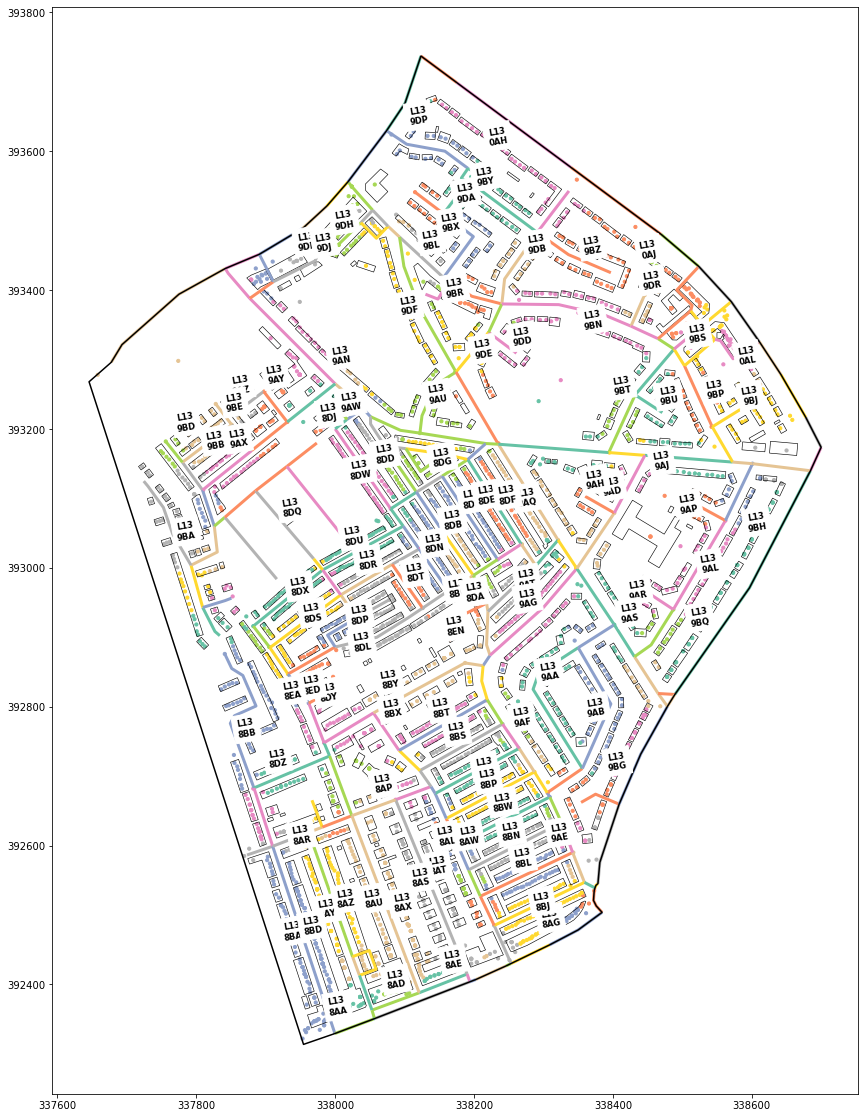

In [71]:
cmap = 'Set2'
_fig, ax = plt.subplots(figsize=(20,20))
# cell_lines.plot(ax=ax, color='grey', linewidth=0.5)
n.buildings.geometry.boundary.plot(color='k', linewidth=0.6, ax=ax)
n.uprn.plot('street', ax=ax, markersize=10, cmap=cmap)
n.roads.plot('id', ax=ax, linewidth=3, cmap=cmap)
gpd.GeoSeries(n.geom.boundary).plot(ax=ax, linewidth=1.5, color='k')
df = road_names
df.NAME1 = df.NAME1.apply(lambda x: x.replace(' ', '\n'))
for i in range(len(df)):
    name = df.iloc[i]
    ax.text(name.geometry.x, name.geometry.y, name.NAME1,
            weight='bold', ha='center', rotation=10, size='small',
           backgroundcolor='white', snap=True)

In [36]:
n.roads.columns

Index(['id', 'endNode', 'startNode', 'roadNumberTOID', 'roadNameTOID',
       'fictitious', 'roadClassification', 'roadFunction', 'formOfWay',
       'length', 'length_uom', 'loop', 'primaryRoute', 'trunkRoad',
       'roadClassificationNumber', 'name1', 'name1_lang', 'name2',
       'name2_lang', 'roadStructure', 'geometry'],
      dtype='object')

In [43]:
df = n.roads[['name1','geometry']]

In [ ]:
n